#
    import data
    cleaning-- (refer EDA.ipynb)
    feature selc
    choose segmentation variables
    methods--(algo in classification -DBSCAN Kmeans, rfm)
    analysis of segmentation
    
    
    --- add if any required--

## feature engineering

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')
## head
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [3]:
##EDA FILE

In [4]:
# Step 2: Feature Engineering

In [5]:
# a. Transaction Frequency
transaction_frequency = data['from_totally_fake_account'].value_counts()
transaction_frequency                       ## no.of trasactions done by user--- how many trasactions each user made

from_totally_fake_account
2331.0     2728
74448.0    2679
97033.0    2665
87324.0    2619
14877.0    2503
           ... 
30617.0     537
22078.0     524
68848.0     513
19964.0     504
55938.0     436
Name: count, Length: 8142, dtype: int64

In [6]:
# b. Total Transaction Amount
total_transaction_amount = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()
total_transaction_amount         ## amount spent by each account

from_totally_fake_account
1000.0      28698.51
1002.0      15622.97
1006.0      18778.19
1018.0      15612.21
1053.0      19444.57
              ...   
100931.0    22332.81
100934.0    18579.25
100947.0    20783.20
100986.0    15314.23
100988.0    19714.77
Name: monopoly_money_amount, Length: 8142, dtype: float64

In [7]:
# c. Transaction Types
transaction_types = data['to_randomly_generated_account'].unique()
transaction_types    ## where they are spending

array(['CINEMA', '40544', '85149', ..., '24636', '1243', 'TURKEY_FARM'],
      dtype=object)

In [8]:
## count of unique values
transaction_count = data['to_randomly_generated_account'].value_counts()
transaction_count  ## count of unique values

to_randomly_generated_account
PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: count, Length: 14300, dtype: int64

In [9]:
# Convert date column to datetime
### may useful for Time Series Analysis

data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')
data['not_happened_yet_date']

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275   2025-12-31
10148276   2025-12-31
10148277   2025-12-31
10148278   2025-12-31
10148279   2025-12-31
Name: not_happened_yet_date, Length: 10148280, dtype: datetime64[ns]

In [10]:
data['not_happened_yet_date'].shape

(10148280,)

In [11]:
# Extracting two columns from the dataset
selected_columns = data[['from_totally_fake_account', 'monopoly_money_amount']]
# Convert 'from_totally_fake_account' column to integer
data['from_totally_fake_account'] = data['from_totally_fake_account'].astype(int)

# Round 'monopoly_money_amount' column to the nearest integer
data['monopoly_money_amount'] = data['monopoly_money_amount'].round().astype(int)
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371,4,CINEMA,2025-01-01
1,88339,2,40544,2025-01-01
2,18555,2,85149,2025-01-01
3,18555,4,HIPSTER_COFFEE_SHOP,2025-01-01
4,80792,2,18555,2025-01-01
...,...,...,...,...
10148275,32185,3,COFFEE_SHOP,2025-12-31
10148276,32185,2,COFFEE_SHOP,2025-12-31
10148277,57569,14,WINE_BAR,2025-12-31
10148278,1490,9,57569,2025-12-31


In [12]:

# Daily transaction counts
#daily_transaction_counts = df.groupby([df['from_totally_fake_account'], df['not_happened_yet_date'].dt.date]).size()

# Weekly transaction counts and total amount spent
weekly_transaction_summary = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('W')]).agg({'monopoly_money_amount': 'sum', 'to_randomly_generated_account': 'count'})

# Monthly transaction counts and total amount spent
monthly_transaction_summary = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('M')]).agg({'monopoly_money_amount': 'sum', 'to_randomly_generated_account': 'count'})

# Yearly transaction counts and total amount spent
yearly_transaction_summary = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('Y')]).agg({'monopoly_money_amount': 'sum', 'to_randomly_generated_account': 'count'})

# Displaying the results
print("\nWeekly Transaction Summary:\n", weekly_transaction_summary)
print("\nMonthly Transaction Summary:\n", monthly_transaction_summary)
print("\nYearly Transaction Summary:\n", yearly_transaction_summary)


Weekly Transaction Summary:
                                                  monopoly_money_amount  \
from_totally_fake_account not_happened_yet_date                          
1000                      2024-12-30/2025-01-05                    354   
                          2025-01-06/2025-01-12                   1752   
                          2025-01-13/2025-01-19                    258   
                          2025-01-20/2025-01-26                    166   
                          2025-01-27/2025-02-02                    132   
...                                                                ...   
100988                    2025-12-01/2025-12-07                    219   
                          2025-12-08/2025-12-14                    393   
                          2025-12-15/2025-12-21                    838   
                          2025-12-22/2025-12-28                    383   
                          2025-12-29/2026-01-04                     72   

       

<Figure size 1200x2000 with 0 Axes>

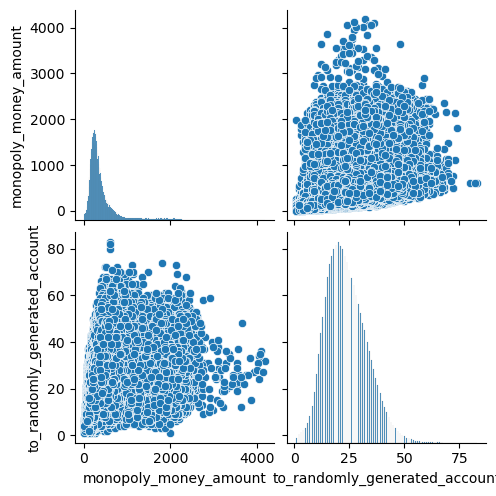

In [13]:
import seaborn as sns

# Selecting a subset of data for visualization
subset_data = weekly_transaction_summary[['monopoly_money_amount', 'to_randomly_generated_account']]
plt.figure(figsize=(12,20))
# Plot pairplot
sns.pairplot(subset_data)
plt.show()

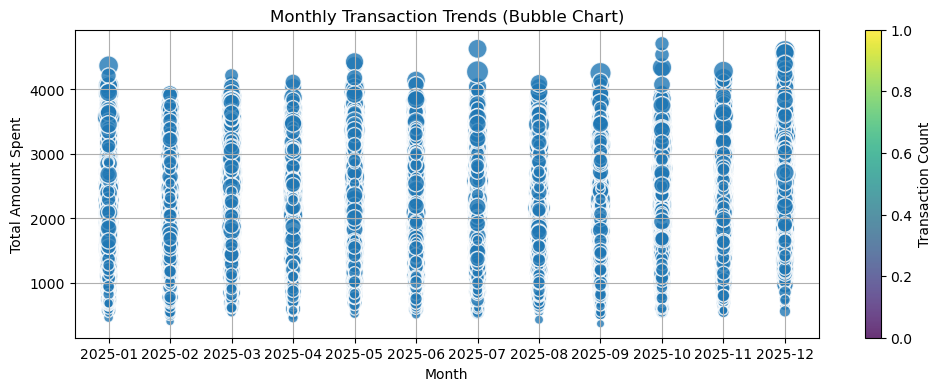

In [14]:
# Assuming 'data' is your DataFrame containing transactional data

# Extracting year and month from the MultiIndex and converting to strings
years = monthly_transaction_summary.index.get_level_values(0).astype(str)
months = monthly_transaction_summary.index.get_level_values(1).strftime('%Y-%m')

# Calculating bubble sizes based on transaction counts
sizes = monthly_transaction_summary['to_randomly_generated_account'].values

# Plotting the bubble chart
plt.figure(figsize=(12, 4))
plt.scatter(months,  # X-axis: months
            monthly_transaction_summary['monopoly_money_amount'],  # Y-axis: total amount spent
            s=sizes,  # Bubble sizes
            alpha=0.8,  # Transparency
            #cmap='viridis',  # Color map
            marker='o',  # Marker shape
            edgecolors='w',  # Edge color for bubbles
            linewidth=1)  # Edge width

# Adding labels and title
plt.title('Monthly Transaction Trends (Bubble Chart)')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.colorbar(label='Transaction Count')

# Display the bubble chart
plt.grid(True)
plt.show()


In [ ]:
## lets try drawing all (weekly,monthly,yearly)data in one graph

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already loaded and processed your data

# Convert 'not_happened_yet_date' column to datetime if not already done
weekly_transaction_summary['not_happened_yet_date'] = weekly_transaction_summary['not_happened_yet_date'].dt.to_timestamp()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(30,15))

# Weekly transaction trends with KDE plot
sns.kdeplot(data=weekly_transaction_summary, x='not_happened_yet_date', y='to_randomly_generated_account', fill=True, ax=ax, label='Weekly KDE', color='blue')

# Monthly transaction trends with histogram
ax.bar(monthly_transaction_summary['not_happened_yet_date'].dt.to_timestamp(), monthly_transaction_summary['to_randomly_generated_account'], label='Monthly Histogram', color='orange', alpha=0.7, width=20)

# Yearly transaction trends with circle markers
ax.scatter(yearly_transaction_summary['not_happened_yet_date'].dt.to_timestamp(), yearly_transaction_summary['to_randomly_generated_account'], s=yearly_transaction_summary['to_randomly_generated_account']*0.1, label='Yearly Circle', color='green', alpha=0.5)

# Set labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Transaction Count')
ax.set_title('Combined Transaction Trends')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


KeyError: 'not_happened_yet_date'

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

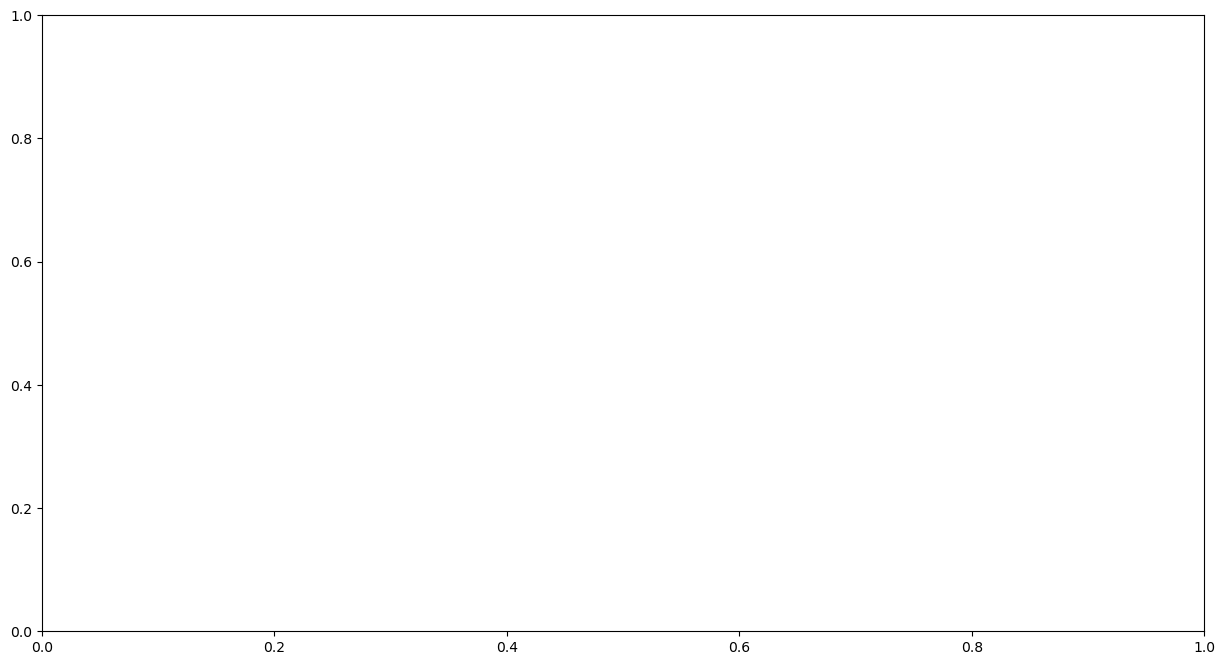

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Weekly transaction trends with KDE plot
sns.kdeplot(data=weekly_transaction_summary, x='not_happened_yet_date', y='to_randomly_generated_account', fill=True, ax=ax, label='Weekly', color='blue', alpha=0.5)

# Monthly transaction trends with line plot
monthly_data = monthly_transaction_summary.groupby('not_happened_yet_date').sum().reset_index()
ax.plot(monthly_data['not_happened_yet_date'], monthly_data['to_randomly_generated_account'], label='Monthly', color='orange')

# Yearly transaction trends with scatter plot
yearly_data = yearly_transaction_summary.groupby('not_happened_yet_date').sum().reset_index()
ax.scatter(yearly_data['not_happened_yet_date'], yearly_data['to_randomly_generated_account'], s=yearly_data['to_randomly_generated_account']*0.1, label='Yearly', color='green', alpha=0.5)

# Set labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Transaction Count')
ax.set_title('Transaction Trends')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=33)

# Show plot
plt.tight_layout()
plt.show()


## Lets see who spent more and where.. 

In [ ]:
# Calculate total amount spent by each user
user_spending = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()

# Find the user who spent the most money
user_with_max_spending = user_spending.idxmax()
max_spending_amount = user_spending.max()

print("User with the most spending:", user_with_max_spending)
print("Total amount spent by the user:", max_spending_amount)

# Find the transaction types where the user spent the most money
transactions_of_max_spender = data[data['from_totally_fake_account'] == user_with_max_spending]
max_spending_transaction_type = transactions_of_max_spender.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().idxmax()

print("Transaction type where the user spent the most money:", max_spending_transaction_type)

In [ ]:
## try for top 10
# Calculate total amount spent by each user
user_spending = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()

# Sort users by total spending in descending order
top_10_users = user_spending.sort_values(ascending=False).head(10)

print("Top 10 users based on total spending:")
print(top_10_users)

In [ ]:
## calculate weekly amount...not total

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Calculate total amount spent by each user
user_spending = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()

# Sort users by total spending in descending order and select the top 10 users
top_10_users = user_spending.sort_values(ascending=False).head(10)

# Generate coordinates for the 3D bar chart
x = range(1, len(top_10_users) + 1)  # User IDs
y = [1] * len(top_10_users)  # Y-coordinate (fixed for all bars)
z = [0] * len(top_10_users)  # Z-coordinate (zero for all bars)
dx = [0.5] * len(top_10_users)  # Width of the bars
dy = [0.5] * len(top_10_users)  # Depth of the bars
dz = top_10_users.values  # Height of the bars (total spending)

# Create a colormap for assigning colors to users
colors = cm.jet(np.linspace(0, 1, len(top_10_users)))

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 3D bar chart with different colors for each user
for i in range(len(top_10_users)):
    ax.bar3d(x[i], y[i], z[i], dx[i], dy[i], dz[i], color=colors[i])

# Customize the plot
ax.set_title('Top 10 Users Based on Total Spending')
ax.set_xlabel('User ID')
ax.set_ylabel('Y')
ax.set_zlabel('Total Spending')

# Add color bar
cbar = fig.colorbar(cm.ScalarMappable(cmap='jet'), ax=ax, shrink=0.5)
cbar.set_label('Total Spending')

# Show plot
plt.show()


In [ ]:
#weekly_transaction_summary.head(10)

In [ ]:
# Top 10 users based on weekly transaction amounts
top_10_weekly_users = weekly_transaction_summary.groupby(level=0)['monopoly_money_amount'].sum().nlargest(10)
print("Top 10 Users based on Weekly Transaction Amounts:\n", top_10_weekly_users)
print('\n')

# Top 10 users based on monthly transaction amounts
top_10_monthly_users = monthly_transaction_summary.groupby(level=0)['monopoly_money_amount'].sum().nlargest(10)
print("Top 10 Users based on Monthly Transaction Amounts:\n", top_10_monthly_users)
print('\n')

# Top 10 users based on yearly transaction amounts
top_10_yearly_users = yearly_transaction_summary.groupby(level=0)['monopoly_money_amount'].sum().nlargest(10)
print("Top 10 Users based on Yearly Transaction Amounts:\n", top_10_yearly_users)


In [ ]:
# Calculate the top 10 users based on weekly transaction amount
top_10_weekly_users = weekly_transaction_summary.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().nlargest(10)

# Assign colors to each user
colors = plt.cm.tab10(np.arange(len(top_10_weekly_users)))

# Plotting
plt.figure(figsize=(3,2))
for i, (user_id, amount) in enumerate(top_10_weekly_users.items()):
    plt.bar(str(user_id), amount, color=colors[i])

plt.title('Top 10 Users based on Weekly Transaction Amount')
plt.xlabel('User ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## for monthly

# Assuming 'data' is your DataFrame containing transactional data

# Calculate the top 10 users based on monthly transaction amount
top_10_monthly_users = monthly_transaction_summary.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().nlargest(10)

# Extracting user IDs and transaction amounts for plotting
user_ids = top_10_monthly_users.index
transaction_amounts = top_10_monthly_users.values

# Generate a list of distinct colors for each user
colors = plt.cm.tab10(np.arange(len(user_ids)))

# Plotting the pie chart with custom colors
plt.figure(figsize=(3,4))
plt.pie(transaction_amounts, labels=user_ids, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Transaction Amounts Among Top 10 Users (Monthly)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the top 10 users based on weekly, monthly, and yearly transaction amounts
top_10_weekly_users = weekly_transaction_summary.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().nlargest(10)
top_10_monthly_users = monthly_transaction_summary.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().nlargest(10)
top_10_yearly_users = yearly_transaction_summary.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().nlargest(10)

# Extract transaction amounts for the top 10 users
weekly_transaction_amounts = weekly_transaction_summary.loc[top_10_weekly_users.index, 'monopoly_money_amount']
monthly_transaction_amounts = monthly_transaction_summary.loc[top_10_monthly_users.index, 'monopoly_money_amount']
yearly_transaction_amounts = yearly_transaction_summary.loc[top_10_yearly_users.index, 'monopoly_money_amount']

# Plotting the transaction amounts for the top 10 users over time
plt.figure(figsize=(50,12 ))

# Weekly transaction amounts
plt.subplot(1, 3, 1)
for user_id in top_10_weekly_users.index:
    plt.plot(weekly_transaction_summary.loc[user_id].index.astype(str), weekly_transaction_summary.loc[user_id, 'monopoly_money_amount'], label=user_id)
plt.title('Weekly Transaction Amounts')
plt.xlabel('Week')
plt.ylabel('Transaction Amount')
plt.legend(title='User ID')
plt.grid(True)

# Monthly transaction amounts
plt.subplot(1, 3, 2)
for user_id in top_10_monthly_users.index:
    plt.plot(monthly_transaction_summary.loc[user_id].index.astype(str), monthly_transaction_summary.loc[user_id, 'monopoly_money_amount'], label=user_id)
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.legend(title='User ID')
plt.grid(True)

In [ ]:
##yearly trasaction count
# Plotting the bar chart
plt.figure(figsize=(4,2))
top_10_yearly_users.plot(kind='bar')
plt.title('Top 10 Users based on Yearly Transaction Amounts')
plt.xlabel('User ID')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
## outileers

In [ ]:
##Z-Score Method
#numericals in monopoly_money_amount, detect outliers in spending amounts. 
#This method will help identify transactions that significantly deviate from the mean spending.

# Calculate mean and standard deviation of spending amounts
mean_amount = np.mean(data['monopoly_money_amount'])
std_dev_amount = np.std(data['monopoly_money_amount'])

# Calculate z-scores
data['z_score'] = (data['monopoly_money_amount'] - mean_amount) / std_dev_amount

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Flag anomalies based on z-score threshold
anomalies = data[abs(data['z_score']) > threshold]

# Display the anomalies
print("Anomalies:")
print(anomalies)

### just outliers

In [ ]:
## try for best fit line

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Calculate transaction frequency for each customer
transaction_frequency = data['from_totally_fake_account'].value_counts().reset_index()
transaction_frequency.columns = ['from_totally_fake_account', 'transaction_frequency']

# Calculate total transaction amount for each customer
total_transaction_amount = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().reset_index()
total_transaction_amount.columns = ['from_totally_fake_account', 'total_transaction_amount']

# Merge the transaction frequency and total transaction amount
customer_data = pd.merge(transaction_frequency, total_transaction_amount, on='from_totally_fake_account')

# Select features for segmentation
features = ['transaction_frequency', 'total_transaction_amount']

# Extracting selected features from the data
X = customer_data[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing the number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# From the elbow method, choose the appropriate number of clusters
# Let's say we choose k=3

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
customer_data['cluster'] = kmeans.labels_

# Visualizing the clusters
plt.scatter(customer_data['transaction_frequency'], customer_data['total_transaction_amount'], c=customer_data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Transaction Frequency')
plt.ylabel('Total Transaction Amount')
plt.title('Customer Segmentation')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Calculate transaction frequency for each customer
transaction_frequency = data['from_totally_fake_account'].value_counts().reset_index()
transaction_frequency.columns = ['from_totally_fake_account', 'transaction_frequency']

# Calculate total transaction amount for each customer
total_transaction_amount = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum().reset_index()
total_transaction_amount.columns = ['from_totally_fake_account', 'total_transaction_amount']

# Merge the transaction frequency and total transaction amount
customer_data = pd.merge(transaction_frequency, total_transaction_amount, on='from_totally_fake_account')

# Select features for segmentation
features = ['transaction_frequency', 'total_transaction_amount']

# Extracting selected features from the data
X = customer_data[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing the number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# From the elbow method, choose the appropriate number of clusters
# Let's say we choose k=3

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
customer_data['cluster'] = kmeans.labels_

# Define the cluster colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}  # Add more colors if needed

# Create a scatter plot for each cluster
for cluster_label, color in cluster_colors.items():
    cluster_data = customer_data[customer_data['cluster'] == cluster_label]
    plt.scatter(cluster_data['transaction_frequency'], cluster_data['total_transaction_amount'], c=color, label=f'Cluster {cluster_label}', alpha=0.5)

# Add labels and title
plt.xlabel('Transaction Frequency')
plt.ylabel('Total Transaction Amount')
plt.title('Customer Segmentation')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
data.to_randomly_generated_account

In [ ]:
# Check unique values in the 'to_randomly_generated_account' column
#unique_values = data['to_randomly_generated_account'].unique()

# Check if any of the unique values can be converted to numeric
#numeric_values = [value for value in unique_values if str(value).replace('.', '').isdigit()]

#if numeric_values:
    #print("Numeric values found:", numeric_values)
#else:
    #print("No numerical values found.")


In [19]:
# Initialize counters
numeric_count = 0
categorical_count = 0

# Iterate through unique values in the column
for value in data['to_randomly_generated_account'].unique():
    # Try to convert the value to a numeric type
    try:
        float(value)
        # If successful, increment numeric count
        numeric_count += 1
    except ValueError:
        # If conversion fails, it's categorical
        categorical_count += 1

# Print the counts
print("Numeric values count:", numeric_count)
print("Categorical values count:", categorical_count)


Numeric values count: 14221
Categorical values count: 79


In [26]:
# Print out the unique categorical values
categorical_values = data.loc[~data['to_randomly_generated_account'].apply(lambda x: str(x).replace('.', '').isdigit()), 'to_randomly_generated_account'].unique()
print("Unique categorical values:")
print(categorical_values)


Unique categorical values:
['CINEMA' 'HIPSTER_COFFEE_SHOP' 'TOTALLY_A_REAL_COFFEE_SHOP' 'COFFEE_SHOP'
 'CAFE' 'A_CAFE' 'LOCAL_RESTAURANT' 'A_LOCAL_COFFEE_SHOP'
 'GOURMET_COFFEE_SHOP' 'LOCAL_WATERING_HOLE' 'SANDWICH_SHOP' 'TOY_SHOP'
 'PRETENTIOUS_COFFEE_SHOP' 'BAR' 'PUB' 'COMIC_BOOK_SHOP' 'LUNCH_VAN'
 'DEPARTMENT_STORE' 'KEBAB_SHOP' 'WINE_BAR' 'ELECTRONICS_SHOP'
 'RESTAURANT' 'LOCAL_PUB' 'LUNCH_PLACE' 'FASHION_SHOP'
 'FASHIONABLE_SPORTSWARE_SHOP' 'SCHOOL_SUPPLY_STORE' 'LOCAL_BOOKSHOP'
 'TRAINER_SHOP' 'BOOKSHOP' 'KIDS_ACTIVITY_CENTRE' 'VIDEO_GAME_STORE'
 'CLOTHES_SHOP' 'TAKEAWAY_CURRY' 'TECH_SHOP' 'NERDY_BOOK_STORE'
 'WHISKEY_BAR' 'PET_TOY_SHOP' 'DVD_SHOP' 'CHILDRENDS_SHOP' 'GAME_SHOP'
 'INDIAN_RESTAURANT' 'COCKTAIL_BAR' 'RUNNING_SHOP' 'DIY_STORE' 'COOKSHOP'
 'HOME_IMPROVEMENT_STORE' 'PET_SHOP' 'CHINESE_TAKEAWAY' 'BUTCHERS'
 'SECOND_HAND_BOOKSHOP' 'G&T_BAR' 'GREENGROCER' 'JEWLLERY_SHOP'
 'ACCESSORY_SHOP' 'TAKEAWAY' 'KIDS_CLOTHING_SHOP' 'SPORT_SHOP'
 'STEAK_HOUSE' 'HIPSTER_ELECTRONICS_SHO

In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Initialize NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization, lowercasing, and removal of stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Preprocess the category names
processed_categories = [preprocess_text(category) for category in categorical_values]

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_categories)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Print the clusters
for i in range(4):
    cluster_samples = [categorical_values[j] for j in range(len(categorical_values)) if kmeans.labels_[j] == i]
    print(f"Cluster {i+1}:\n{cluster_samples}\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bu23957\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bu23957\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 1:
['CINEMA', 'HIPSTER_COFFEE_SHOP', 'TOTALLY_A_REAL_COFFEE_SHOP', 'COFFEE_SHOP', 'CAFE', 'A_CAFE', 'LOCAL_RESTAURANT', 'A_LOCAL_COFFEE_SHOP', 'GOURMET_COFFEE_SHOP', 'LOCAL_WATERING_HOLE', 'SANDWICH_SHOP', 'TOY_SHOP', 'PRETENTIOUS_COFFEE_SHOP', 'BAR', 'COMIC_BOOK_SHOP', 'LUNCH_VAN', 'DEPARTMENT_STORE', 'KEBAB_SHOP', 'WINE_BAR', 'ELECTRONICS_SHOP', 'RESTAURANT', 'LOCAL_PUB', 'LUNCH_PLACE', 'FASHION_SHOP', 'FASHIONABLE_SPORTSWARE_SHOP', 'SCHOOL_SUPPLY_STORE', 'LOCAL_BOOKSHOP', 'TRAINER_SHOP', 'KIDS_ACTIVITY_CENTRE', 'VIDEO_GAME_STORE', 'CLOTHES_SHOP', 'TAKEAWAY_CURRY', 'TECH_SHOP', 'NERDY_BOOK_STORE', 'WHISKEY_BAR', 'PET_TOY_SHOP', 'DVD_SHOP', 'CHILDRENDS_SHOP', 'GAME_SHOP', 'INDIAN_RESTAURANT', 'RUNNING_SHOP', 'DIY_STORE', 'COOKSHOP', 'HOME_IMPROVEMENT_STORE', 'PET_SHOP', 'CHINESE_TAKEAWAY', 'SECOND_HAND_BOOKSHOP', 'G&T_BAR', 'GREENGROCER', 'JEWLLERY_SHOP', 'ACCESSORY_SHOP', 'TAKEAWAY', 'KIDS_CLOTHING_SHOP', 'SPORT_SHOP', 'STEAK_HOUSE', 'HIPSTER_ELECTRONICS_SHOP', 'CHINESE_RESTA

In [40]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

# Initialize NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization, lowercasing, and removal of stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Preprocess the category names
processed_categories = [preprocess_text(category) for category in categorical_values]

# Define the pipeline with TF-IDF vectorization and Truncated SVD for dimensionality reduction
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svd', TruncatedSVD(n_components=74, random_state=70)),  # Adjust the number of components as needed
    ('kmeans', KMeans(n_clusters=9, random_state=90))  # Adjust the number of clusters as needed
])

# Fit the pipeline
pipeline.fit(processed_categories)

# Print the clusters
for cluster_idx in range(pipeline.named_steps['kmeans'].n_clusters):
    cluster_samples = [categorical_values[i] for i, label in enumerate(pipeline.predict(processed_categories)) if label == cluster_idx]
    print(f"Cluster {cluster_idx + 1}:\n{cluster_samples}\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bu23957\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bu23957\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 1:
['TOY_SHOP', 'LUNCH_PLACE', 'FASHION_SHOP', 'DIY_STORE', 'LARGE_SUPERMARKET']

Cluster 2:
['CINEMA', 'DEPARTMENT_STORE', 'WINE_BAR', 'SCHOOL_SUPPLY_STORE', 'TRAINER_SHOP', 'CLOTHES_SHOP', 'TECH_SHOP', 'WHISKEY_BAR', 'DVD_SHOP', 'GAME_SHOP', 'HOME_IMPROVEMENT_STORE', 'CHINESE_TAKEAWAY', 'GREENGROCER', 'SEAFOOD_RESAURANT', 'RESTAURANT_VOUCHER', 'LIQUOR_STORE', 'TO_BEAN_OR_NOT_TO_BEAN', 'WINE_CELLAR', 'A_SUPERMARKET', 'THE_SUPERMARKET', 'FLORIST', 'TURKEY_FARM']

Cluster 3:
['RESTAURANT', 'WHISKEY_SHOP']

Cluster 4:
['G&T_BAR']

Cluster 5:
['HIPSTER_COFFEE_SHOP', 'TOTALLY_A_REAL_COFFEE_SHOP', 'CAFE', 'COMIC_BOOK_SHOP', 'KEBAB_SHOP', 'ELECTRONICS_SHOP', 'LOCAL_PUB', 'JEWLLERY_SHOP', 'ACCESSORY_SHOP', 'STEAK_HOUSE', 'CHINESE_RESTAURANT', 'GYM', 'WE_HAVE_BEAN_WEIGHTING']

Cluster 6:
['CHILDRENDS_SHOP', 'COOKSHOP', 'PET_SHOP', 'EXPRESS_SUPERMARKET']

Cluster 7:
['LOCAL_RESTAURANT', 'PRETENTIOUS_COFFEE_SHOP', 'VIDEO_GAME_STORE', 'PET_TOY_SHOP', 'HIPSTER_ELECTRONICS_SHOP']

Cluster 8

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocess the category names (assuming categorical_values is your list of category names)
processed_categories = [' '.join(category.split('_')) for category in categorical_values]

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_categories)

# Scale the features
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Print the clusters
for i in range(5):
    cluster_samples = [categorical_values[j] for j in range(len(categorical_values)) if kmeans.labels_[j] == i]
    print(f"Cluster {i+1}:\n{cluster_samples}\n")


Cluster 1:
['LOCAL_RESTAURANT', 'A_LOCAL_COFFEE_SHOP', 'LOCAL_PUB', 'LOCAL_BOOKSHOP', 'SECOND_HAND_BOOKSHOP']

Cluster 2:
['TO_BEAN_OR_NOT_TO_BEAN']

Cluster 3:
['CINEMA', 'TOTALLY_A_REAL_COFFEE_SHOP', 'COFFEE_SHOP', 'CAFE', 'A_CAFE', 'GOURMET_COFFEE_SHOP', 'LOCAL_WATERING_HOLE', 'SANDWICH_SHOP', 'TOY_SHOP', 'PRETENTIOUS_COFFEE_SHOP', 'BAR', 'COMIC_BOOK_SHOP', 'LUNCH_VAN', 'DEPARTMENT_STORE', 'KEBAB_SHOP', 'WINE_BAR', 'RESTAURANT', 'LUNCH_PLACE', 'FASHION_SHOP', 'FASHIONABLE_SPORTSWARE_SHOP', 'SCHOOL_SUPPLY_STORE', 'TRAINER_SHOP', 'KIDS_ACTIVITY_CENTRE', 'VIDEO_GAME_STORE', 'CLOTHES_SHOP', 'TAKEAWAY_CURRY', 'TECH_SHOP', 'NERDY_BOOK_STORE', 'WHISKEY_BAR', 'PET_TOY_SHOP', 'DVD_SHOP', 'CHILDRENDS_SHOP', 'GAME_SHOP', 'INDIAN_RESTAURANT', 'RUNNING_SHOP', 'DIY_STORE', 'COOKSHOP', 'HOME_IMPROVEMENT_STORE', 'PET_SHOP', 'CHINESE_TAKEAWAY', 'G&T_BAR', 'GREENGROCER', 'JEWLLERY_SHOP', 'ACCESSORY_SHOP', 'TAKEAWAY', 'KIDS_CLOTHING_SHOP', 'SPORT_SHOP', 'STEAK_HOUSE', 'CHINESE_RESTAURANT', 'SEAFOOD_RE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing transactional data

# Convert 'to_randomly_generated_account' column to string if not already done
data['to_randomly_generated_account'] = data['to_randomly_generated_account'].astype(str)

# Extract top 10 amounts received in string format
top_10_string = data['to_randomly_generated_account'].value_counts().head(10)

# Convert 'to_randomly_generated_account' column to numeric type (if possible)
data['to_randomly_generated_account'] = pd.to_numeric(data['to_randomly_generated_account'], errors='coerce')

# Drop NaN values (non-convertible string values)
data.dropna(subset=['to_randomly_generated_account'], inplace=True)

# Extract top 10 amounts received in integer format
top_10_int = data['to_randomly_generated_account'].value_counts().head(10)

# Create subplots for comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot top 10 amounts received in string format
axs[0].bar(top_10_string.index, top_10_string.values, color='skyblue')
axs[0].set_title('Top 10 Amounts Received (String)')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)

# Plot top 10 amounts received in integer format
axs[1].bar(top_10_int.index.astype(str), top_10_int.values, color='lightgreen')
axs[1].set_title('Top 10 Amounts Received (Integer)')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get unique transaction types
transaction_types = data['to_randomly_generated_account'].unique()

# Calculate total spending for each transaction type
total_spending = data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum()

# Sort the transaction types based on total spending
sorted_transaction_types = total_spending.sort_values(ascending=False).index

# Choose the top N transaction types to display
top_n = 10
top_transaction_types = sorted_transaction_types[:top_n]

# Aggregate the rest of the transaction types into an "Other" category
other_spending = total_spending[sorted_transaction_types[top_n:]].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.barh(list(top_transaction_types) + ['Other'], list(total_spending[top_transaction_types]) + [other_spending], color='skyblue')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Type')
plt.title(f'Top {top_n} Transaction Types by Spending')
plt.show()


In [ ]:
### its taking differnt diif.. before grouping

In [ ]:
import plotly.graph_objects as go

# Get unique transaction types
transaction_types = data['to_randomly_generated_account'].unique()

# Calculate total spending for each transaction type
total_spending = data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum()

# Sort the transaction types based on total spending
sorted_transaction_types = total_spending.sort_values(ascending=False).index

# Choose the top N transaction types to display
top_n = 10
top_transaction_types = sorted_transaction_types[:top_n]

# Aggregate the rest of the transaction types into an "Other" category
other_spending = total_spending[sorted_transaction_types[top_n:]].sum()

# Create figure
fig = go.Figure()

# Add bar trace for top transaction types
fig.add_trace(go.Bar(
    x=list(top_transaction_types) + ['Other'],
    y=list(total_spending[top_transaction_types]) + [other_spending],
    marker_color='green'
))

# Update layout
fig.update_layout(
    title=f'Top {top_n} Transaction Types by Spending',
    xaxis_title='Transaction Type',
    yaxis_title='Total Spending'
)

# Show figure
fig.show()


In [ ]:
## categorising

In [ ]:
# Define keywords for grouping
transaction_keywords = {
    'coffee': ['CAFE', 'COFFEE_SHOP', 'A_CAFE', 'TOTALLY_A_REAL_COFFEE_SHOP', 'GOURMET_COFFEE_SHOP', 'HIPSTER_COFFEE_SHOP'],
    'restaurant': ['LOCAL_RESTAURANT', 'INDIAN_RESTAURANT', 'STEAK_HOUSE', 'SEAFOOD_RESAURANT'],
    'pub_bar': ['LOCAL_WATERING_HOLE', 'BAR', 'PUB', 'WHISKEY_BAR', 'COCKTAIL_BAR', 'G&T_BAR'],
    'shop': ['TOY_SHOP', 'COMIC_BOOK_SHOP', 'ELECTRONICS_SHOP', 'FASHION_SHOP', 'FASHIONABLE_SPORTSWARE_SHOP', 'SCHOOL_SUPPLY_STORE', 'LOCAL_BOOKSHOP', 'TRAINER_SHOP', 'BOOKSHOP', 'KIDS_ACTIVITY_CENTRE', 'VIDEO_GAME_STORE', 'CLOTHES_SHOP', 'TECH_SHOP', 'DIY_STORE', 'COOKSHOP', 'HOME_IMPROVEMENT_STORE', 'CHINESE_TAKEAWAY', 'SECOND_HAND_BOOKSHOP', 'GREENGROCER', 'JEWLLERY_SHOP', 'ACCESSORY_SHOP', 'KIDS_CLOTHING_SHOP', 'SPORT_SHOP', 'HIPSTER_ELECTRONICS_SHOP', 'CHINESE_RESTAURANT'],
    'entertainment': ['CINEMA', 'DVD_SHOP'],
    'supermarket': ['DEPARTMENT_STORE', 'LARGE_SUPERMARKET', 'EXPRESS_SUPERMARKET', 'A_SUPERMARKET', 'THE_SUPERMARKET'],
    'others': ['LUNCH_VAN', 'RESTAURANT_VOUCHER', 'ROASTERIE', 'LIQUOR_STORE', 'TO_BEAN_OR_NOT_TO_BEAN', 'WINE_CELLAR', 'WE_HAVE_BEAN_WEIGHTING', 'FLORIST', 'TURKEY_FARM']
}

# Function to assign category based on keywords
def assign_category(transaction):
    for category, keywords in transaction_keywords.items():
        for keyword in keywords:
            if keyword in transaction:
                return category
    return 'others'

# Apply the function to create a new column 'transaction_category'
data['transaction_category'] = data['to_randomly_generated_account'].apply(assign_category)

# Display the first few rows of the updated dataframe
print(data[['to_randomly_generated_account', 'transaction_category']].head(5))


In [ ]:
## , format='%d/%m/%Y'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the dataset
data = pd.read_csv('fake_transactional_data_24.csv')

# Display the head of the dataset
print(data.head())

# Encode categorical variables
label_encoder = LabelEncoder()
data['to_randomly_generated_account'] = label_encoder.fit_transform(data['to_randomly_generated_account'])

# Convert 'not_happened_yet_date' column to datetime
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

# Scale numerical variables
scaler = StandardScaler()
data[['from_totally_fake_account', 'monopoly_money_amount']] = scaler.fit_transform(data[['from_totally_fake_account', 'monopoly_money_amount']])

# Split the data into train and test sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Ensure all data is numerical before training the autoencoder
X_train = X_train.drop(columns=['not_happened_yet_date'])  # Drop non-numeric column
X_test = X_test.drop(columns=['not_happened_yet_date'])  # Drop non-numeric column

# Convert pandas DataFrame to NumPy array
X_train = X_train.values
X_test = X_test.values

# Define autoencoder architecture
input_dim = X_train.shape[1]  # Dimension of input data
latent_dim = 64  # Dimension of latent space

# Encoder
inputs = Input(shape=(input_dim,))
encoded = Dense(latent_dim, activation='relu')(inputs)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=1, batch_size=32, validation_data=(X_test, X_test))

# Extract latent space representation
encoder = Model(inputs, encoded)
latent_representation_train = encoder.predict(X_train)
latent_representation_test = encoder.predict(X_test)

# Apply clustering algorithm (e.g., K-means) to latent space representation
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(latent_representation_train)

# Predict clusters for test data
clusters_test = kmeans.predict(latent_representation_test)

# Add cluster labels to test data
X_test = pd.DataFrame(X_test, columns=data.columns.drop('not_happened_yet_date'))  # Convert back to DataFrame
X_test['cluster'] = clusters_test

# Display the clustered test data
print(X_test.head())


In [ ]:
## monthly transaction graph
## any non similar users/shops
## work on unique data
## 